https://www.boe.es/buscar/act.php?id=BOE-A-2013-13645&p=20211027&tn=1#a30

In [17]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pot_instalada = [17094.125,3331.4,7117.29,3764.125,7.95,768.67,1148.65,482.64,26250.145,11.32,28743.182,15908.209,2304.013,1092.666,5654.419,440.861,170.112]
nombres = ["Hidráulica","Turbinación bombeo","Nuclear","Carbón","Fuel + Gas","Motores diésel","Turbina de gas","Turbina de vapor","Ciclo combinado","Hidroeólica","Eólica","Solar fotovoltaica","Solar térmica","Otras renovables","Cogeneración","Residuos no renovables","Residuos renovables"]

# df = pd.DataFrame({'Potencia Instalada (MW)':pot_instalada,
#                   'Tecnologia' : nombres})
# fig = px.bar(df, x="Potencia Instalada (MW)", y="Tecnologia", orientation='h')
# fig.show()

In [13]:
import pandas as pd
from metricas import calculo_metricas, mae, wmape

df = pd.read_csv('Resultados/stacked_model_ridge.csv', index_col = 0)

df = df.drop(columns = ['MAE', 'MAPE'])
df.index = pd.to_datetime(df.index)
a,b,c = calculo_metricas(df)

    MAE  MAE (median)   MAPE  WMAPE   RMSE  % Trend
0  8.98           5.6  79.07   8.02  14.77    84.95


### Métricas por día de la semana

In [47]:
mae_day = df.groupby(df.index.weekday).mean()["MAE"]
wmape_day = df.groupby(df.index.weekday).apply(lambda x: wmape(x.Pred,x.Real))

metricas_dia = pd.DataFrame({'MAE' : mae_day.values,
             'WMAPE' : wmape_day.values}, index = ['Lunes', 'Martes', 'Miercoles',
                                                   'Jueves', 'Viernes', 'Sabado', 'Domingo'])

metricas_dia = metricas_dia.reset_index().melt(id_vars = 'index', var_name = 'Metrica').set_index('index')

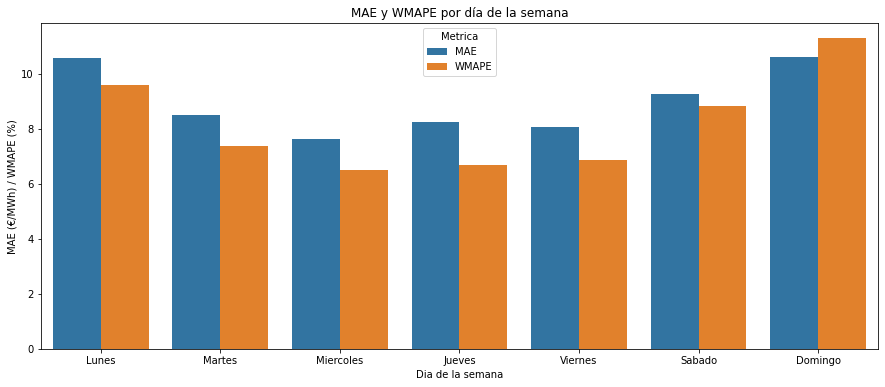

In [51]:
plt.figure(figsize = (15,6))
sns.barplot(data = metricas_dia, x = metricas_dia.index, y = 'value', hue = 'Metrica')
plt.xlabel('Dia de la semana')
plt.ylabel('MAE (€/MWh) / WMAPE (%)')
plt.title('MAE y WMAPE por día de la semana')
plt.show()

### Métricas por hora del día

In [52]:
mae_hour = df.groupby(df.index.hour).mean()["MAE"]
wmape_hour = df.groupby(df.index.hour).apply(lambda x: wmape(x.Pred,x.Real))

metricas_hour = pd.DataFrame({'MAE' : mae_hour.values,
             'WMAPE' : wmape_hour.values}, index = [i for i in range(1, 25)])

metricas_hour = metricas_hour.reset_index().melt(id_vars = 'index', var_name = 'Metrica').set_index('index')

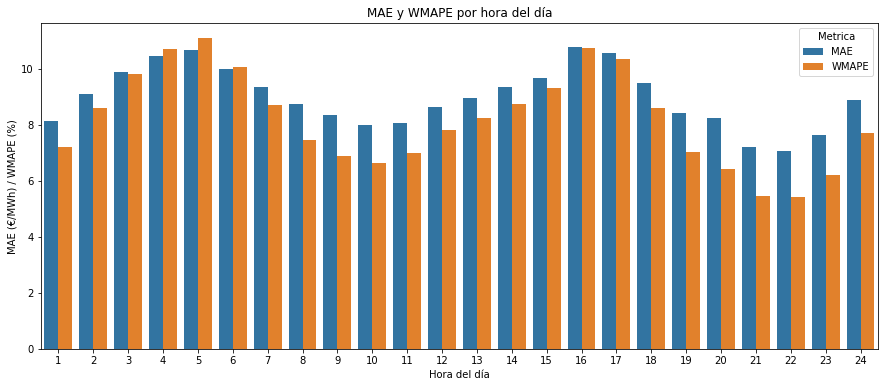

In [54]:
plt.figure(figsize = (15,6))
sns.barplot(data = metricas_hour, x = metricas_hour.index, y = 'value', hue = 'Metrica')
plt.xlabel('Hora del día')
plt.ylabel('MAE (€/MWh) / WMAPE (%)')
plt.title('MAE y WMAPE por hora del día')
plt.show()

### Métricas por mes

In [56]:
mae_month = df.groupby(df.index.month).mean()["MAE"]
wmape_month = df.groupby(df.index.month).apply(lambda x: wmape(x.Pred,x.Real))

metricas_month = pd.DataFrame({'MAE' : mae_month.values,
             'WMAPE' : wmape_month.values}, index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo',
                    'Junio', 'Julio', 'Agosto', 'Septiembre','Octubre','Noviembre','Diciembre'])

metricas_month = metricas_month.reset_index().melt(id_vars = 'index', var_name = 'Metrica').set_index('index')

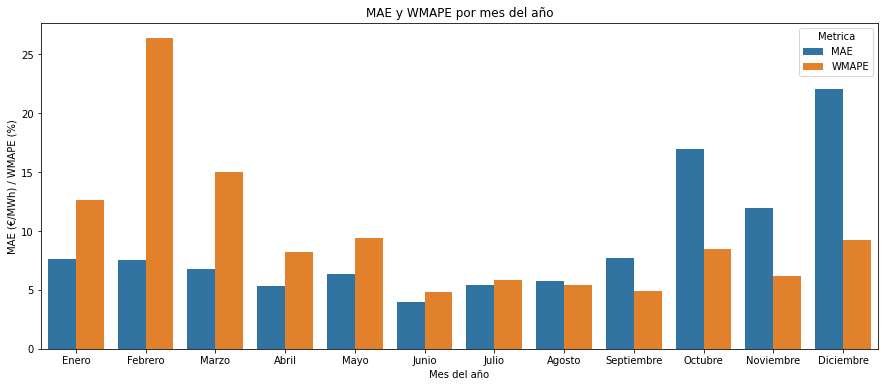

In [58]:
plt.figure(figsize = (15,6))
sns.barplot(data = metricas_month, x = metricas_month.index, y = 'value', hue = 'Metrica')
plt.xlabel('Mes del año')
plt.ylabel('MAE (€/MWh) / WMAPE (%)')
plt.title('MAE y WMAPE por mes del año')
plt.show()